1


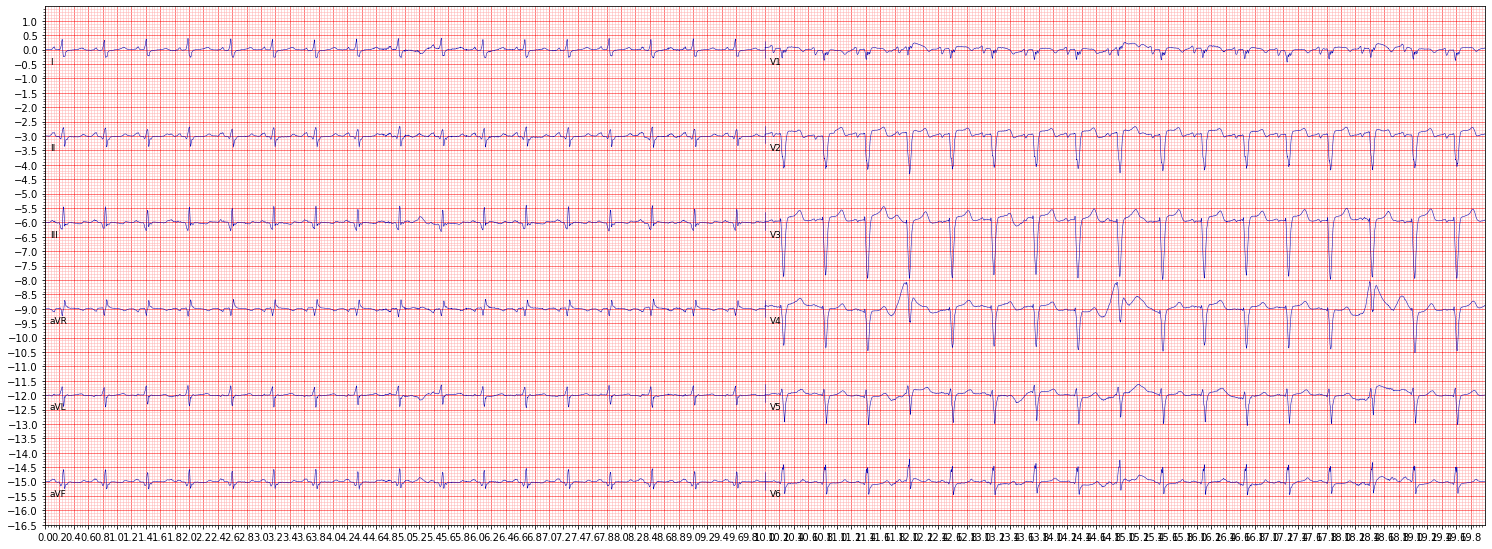

In [6]:
import physionet_challenge_utility_script as pc

import ecg_plot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_addons as tfa
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.utils.vis_utils import plot_model
from keras.preprocessing.sequence import pad_sequences

print(1)

%load_ext autoreload
%autoreload
%reload_ext autoreload

def plot_ecg(path):
    ecg_data = pc.load_challenge_data(path)
    ecg_plot.plot(ecg_data[0]/1000, sample_rate=500, title='')
    ecg_plot.show()
plot_ecg("SM22_MLData/China12Lead/Q0001.mat")


In [8]:
DATADIR = "./SM22_MLData"

In [64]:
firstModelData = {}
firstModelData["gender"], firstModelData["age"], firstModelData["labels"], firstModelData["ecg_filenames"] = pc.import_key_data(DATADIR)
ecg_filenames = np.asarray(ecg_filenames)

In [65]:
print(len(firstModelData["labels"]))
for i in range(len(firstModelData["labels"])):
    try:
        splitLabels = firstModelData["labels"][i].split(",")
    except:
        print(i)
        break
    isSR, isNSR = 0, 0
    if len(splitLabels) > 1:
        isNSR = 1
    if not("426783006" in splitLabels):
        isNSR = 1
    if "426783006" in splitLabels:
        isSR = 1
    firstModelData["labels"][i] = "{},{}".format(isSR, isNSR)
    

43101


In [ ]:
print(firstModelData["gender"]

<AxesSubplot:>

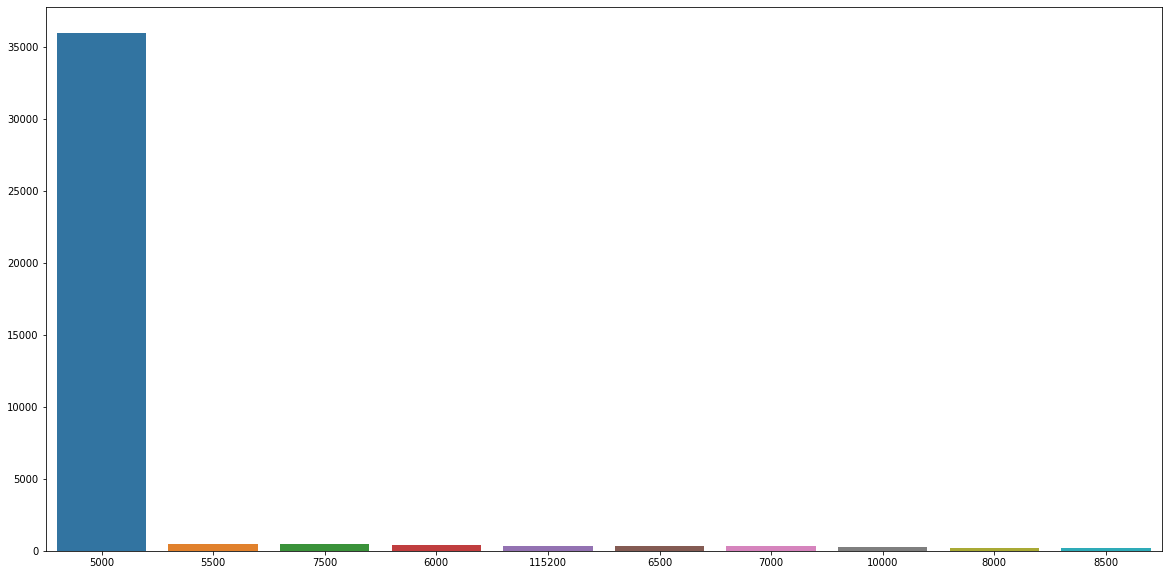

In [42]:
import os
signal_length=[]
for subdir, dirs, files in sorted(os.walk(DATADIR)):
    for filename in files:
        filepath = subdir + os.sep + filename
        if filepath.endswith(".mat"):
            data, header_data = pc.load_challenge_data(filepath)
            splitted = header_data[0].split()
            signal_length.append(splitted[3])
signal_length_df = pd.DataFrame(signal_length)
signal_count = signal_length_df[0].value_counts()
plt.figure(figsize=(20,10))
#plt.title(title,fontsize =36)
sns.barplot(x=signal_count[:10,].index, y=signal_count[:10,].values)

In [47]:
signal_count[:10,].index
signal_count[:10,].values

array([35948,   460,   447,   391,   359,   341,   300,   268,   197,
         176])

In [14]:
age, gender = pc.import_gender_and_age(age, gender)

gender data shape: 43101
age data shape: 43101


In [17]:
SNOMED_scored=pd.read_csv(f"{DATADIR}/SNOMEDMappings/SNOMED_mappings_scored.csv", sep=";")
SNOMED_unscored=pd.read_csv(f"{DATADIR}/SNOMEDMappings/SNOMED_mappings_unscored.csv", sep=";")
df_labels = pc.make_undefined_class(labels,SNOMED_unscored)

In [21]:
y , snomed_classes = pc.onehot_encode(df_labels)

The classes we will look at are encoded as SNOMED CT codes:
['10370003' '111975006' '164889003' '164890007' '164909002' '164917005'
 '164934002' '164947007' '17338001' '251146004' '270492004' '284470004'
 '39732003' '426177001' '426627000' '426783006' '427084000' '427172004'
 '427393009' '445118002' '47665007' '59118001' '59931005' '63593006'
 '698252002' '713426002' '713427006' 'undefined class']
classes: 27


In [39]:
snomed_classes

array(['10370003', '111975006', '164889003', '164890007', '164909002',
       '164917005', '164934002', '164947007', '17338001', '251146004',
       '270492004', '284470004', '39732003', '426177001', '426627000',
       '426783006', '427084000', '427172004', '427393009', '445118002',
       '47665007', '59118001', '59931005', '63593006', '698252002',
       '713426002', '713427006'], dtype=object)

In [22]:
snomed_abbr = []
for j in range(len(snomed_classes)):
    for i in range(len(SNOMED_scored.iloc[:,1])):
        if (str(SNOMED_scored.iloc[:,1][i]) == snomed_classes[j]):
            snomed_abbr.append(SNOMED_scored.iloc[:,2][i])
            
snomed_abbr = np.asarray(snomed_abbr)
snomed_abbr

array(['PR', 'LQT', 'AF', 'AFL', 'LBBB', 'QAb', 'TAb', 'LPR', 'VPB',
       'LQRSV', 'IAVB', 'PAC', 'LAD', 'SB', 'Brady', 'SNR', 'STach',
       'PVC', 'SA', 'LAnFB', 'RAD', 'RBBB', 'TInv', 'SVPB', 'NSIVCB',
       'IRBBB', 'CRBBB'], dtype='<U6')

In [48]:
y_all_comb = pc.get_labels_for_all_combinations(y)

array([101,  48,   0, ...,  48,   0,  48])

In [26]:
folds = pc.split_data(labels, y_all_comb)

Training split: 38790
Validation split: 4311


/Users/pranav/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


In [33]:
len(folds[0][1])

4311

In [36]:
folds[0][1][0:1000]

array([  25,   45,   51,   60,   73,   84,   85,   92,   95,   97,  107,
        116,  118,  125,  138,  146,  157,  183,  186,  191,  213,  232,
        235,  242,  256,  268,  281,  293,  305,  325,  330,  338,  345,
        350,  363,  368,  370,  373,  390,  403,  407,  412,  413,  454,
        481,  484,  487,  495,  505,  522,  545,  567,  579,  581,  582,
        589,  590,  606,  616,  618,  623,  647,  648,  658,  659,  677,
        679,  681,  689,  693,  725,  738,  748,  754,  767,  778,  781,
        792,  797,  803,  811,  816,  820,  835,  844,  847,  862,  878,
        881,  885,  889,  908,  919,  922,  929,  939,  942,  945,  947,
        955,  960,  965,  968,  974,  978,  983,  999, 1001, 1021, 1022,
       1023, 1024, 1035, 1037, 1050, 1053, 1059, 1068, 1075, 1080, 1083,
       1086, 1089, 1093, 1095, 1110, 1118, 1124, 1135, 1136, 1182, 1190,
       1203, 1206, 1207, 1213, 1233, 1238, 1246, 1261, 1263, 1279, 1293,
       1298, 1318, 1324, 1366, 1369, 1383, 1395, 13